In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
from dataloading import get_labeled_data

# Load the data

In [4]:
# file paths
train_path = "../data/preprocessed/train_vectors.csv"
scaled_train_path = "../data/preprocessed/train_vectors_scaled.csv"

In [5]:
# load the dataframes
train_df = pd.read_csv(train_path)
train_df_scaled = pd.read_csv(scaled_train_path)

In [6]:
# using the scaled dataframe
train_df_scaled.head()

,Packet speed,Data speed,Avg packet len,Source IP count,time_of_day,Attack duration,Significant flag,RIP,SYN Attack,NTP,...,CoAP,CHARGEN,DNS,High volume traffic,is_weekday,Type,is_synthetic,Port number,victim IP num,other_attack_codes
0,-0.219829,-0.140172,0.572461,-0.096772,0.742175,1,0,0,0,0,...,0,0,0,1,1,Normal traffic,False,-0.512798,-1.195904,0
1,-0.183235,-0.051424,0.805090,-0.105015,0.811677,0,0,0,0,0,...,0,0,0,1,1,Normal traffic,False,-0.512798,-1.195870,0
2,-0.200837,-0.108849,0.602722,-0.105015,0.821528,1,0,0,0,0,...,0,0,0,1,1,Normal traffic,False,-0.654663,-1.195836,0
3,-0.173044,-0.072306,0.602722,-0.105015,0.821570,1,0,0,0,0,...,0,0,0,1,1,Normal traffic,False,-0.654663,-1.195836,0
4,-0.201764,-0.077527,0.767264,-0.105015,0.837491,1,0,0,0,0,...,0,0,0,1,1,Normal traffic,False,-0.512798,-1.195870,0


In [7]:
# get target features
#train_df_scaled = train_df_scaled[train_df_scaled['is_synthetic'] == False]
data_df = train_df_scaled.drop(columns=['is_synthetic','Type'])
data_df = data_df.reindex(sorted(data_df.columns), axis=1)
target_df = train_df_scaled['Type']

# encode target labels
target_label_encoder = LabelEncoder()
target_label_encoder.fit(target_df)
target_df = target_label_encoder.transform(target_df)

X = data_df.to_numpy()
y = target_df

In [8]:
# train - test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9921288738914336


In [10]:
from sklearn.metrics import classification_report
# Predict on the testing data
y_pred = rf_classifier.predict(X_test)

target_names = target_label_encoder.inverse_transform([0,1,2])

print(classification_report(y_test, y_pred, target_names=target_names))

                    precision    recall  f1-score   support

       DDoS attack       0.99      0.99      0.99    191347
    Normal traffic       0.99      0.99      0.99    273987
Suspicious traffic       0.99      0.99      0.99    191370

          accuracy                           0.99    656704
         macro avg       0.99      0.99      0.99    656704
      weighted avg       0.99      0.99      0.99    656704



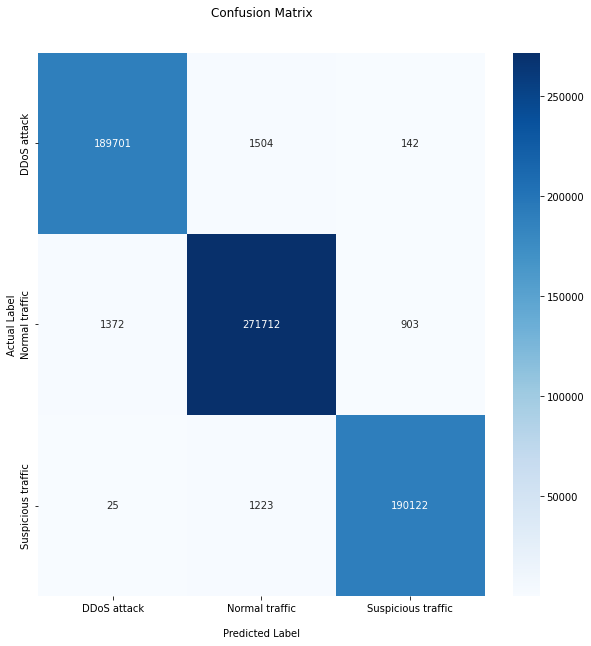

In [13]:
cf_matrix = confusion_matrix(y_test, y_pred)

fig = plt.figure(figsize=(10,10))

class_names = target_label_encoder.inverse_transform([0,1,2])

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt = 'd', xticklabels=class_names, yticklabels=class_names)

ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Label')
ax.set_ylabel('Actual Label')

## Display the visualization of the Confusion Matrix.
plt.show()

# Eval

In [14]:
test_path = "../data/preprocessed/test_vectors_scaled.csv"
gen_path = "../data/preprocessed/generalisation_vectors_scaled.csv"

test_df = pd.read_csv(test_path)
gen_df = pd.read_csv(gen_path)

In [15]:
def preprocess(df, label_encoder = None):
    # get target features
    data_df = df.drop(columns=['Type'])
    if "is_synthetic" in data_df.columns:
        data_df.drop(columns=['is_synthetic'], inplace = True)
    data_df = data_df.reindex(sorted(data_df.columns), axis=1)
    target_df = df['Type']

    # encode target labels
    if label_encoder is None:
        label_encoder = LabelEncoder()
        label_encoder.fit(target_df)
    target_df = label_encoder.transform(target_df)

    X = data_df.to_numpy()
    y = target_df

    return X, y, label_encoder

In [17]:
# preprocess the datasets
X_test, y_test, _ =  preprocess(test_df, label_encoder=target_label_encoder)
X_gen, y_gen, _ =  preprocess(gen_df, label_encoder=target_label_encoder)

In [18]:
print(X_test.shape, X_gen.shape)

(1233449, 30) (2446687, 30)


Accuracy: 0.724499351006811


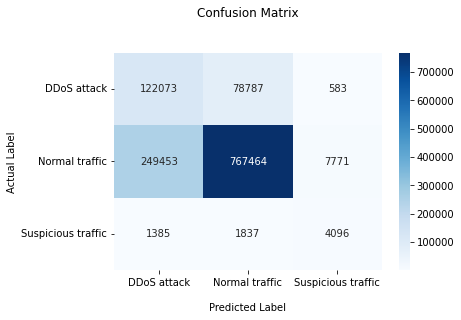

In [19]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cf_matrix = confusion_matrix(y_test, y_pred)

class_names = target_label_encoder.inverse_transform([0,1,2])

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt = 'd', xticklabels=class_names, yticklabels=class_names)

ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Label')
ax.set_ylabel('Actual Label')

## Display the visualization of the Confusion Matrix.
plt.show()

Accuracy: 0.46900236932635847


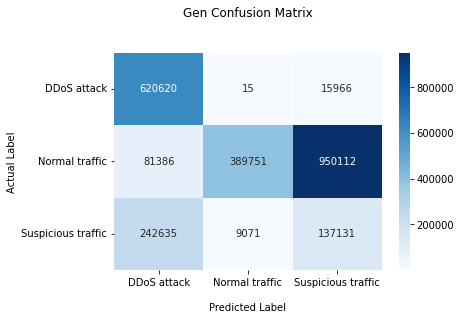

In [20]:
# Make predictions on the gen data
y_pred = rf_classifier.predict(X_gen)

# Calculate accuracy of the model
accuracy = accuracy_score(y_gen, y_pred)
print("Accuracy:", accuracy)

cf_matrix = confusion_matrix(y_gen, y_pred)

class_names = target_label_encoder.inverse_transform([0,1,2])

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt = 'd', xticklabels=class_names, yticklabels=class_names)

ax.set_title('Gen Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Label')
ax.set_ylabel('Actual Label')

## Display the visualization of the Confusion Matrix.
plt.show()

In [30]:
importances = {}
for feat, importance in zip(data_df.columns,rf_classifier.feature_importances_):
    importances[feat] = importance

In [34]:
sorted(importances.items(), key= lambda x: x[1], reverse=True)

[('Attack duration', 0.2845788753442392),
 ('victim IP num', 0.15665751017894292),
 ('Avg packet len', 0.09082131457647837),
 ('time_of_day', 0.07865817172552507),
 ('Source IP count', 0.07293494547113684),
 ('Data speed', 0.06877623242785384),
 ('Port number', 0.05718976970358191),
 ('Packet speed', 0.05692276272058851),
 ('High volume traffic', 0.049358762440946446),
 ('Significant flag', 0.02915050131402597),
 ('Suspicious traffic', 0.028697393457229322),
 ('DNS', 0.008430439540586003),
 ('is_weekday', 0.007473647326968602),
 ('CLDAP', 0.003351865628584742),
 ('Generic UDP', 0.002813244340531843),
 ('ICMP', 0.001768053295759846),
 ('NTP', 0.0013378939343356017),
 ('SYN Attack', 0.00046270850665528916),
 ('Memcached', 0.00017046823011324547),
 ('TCP Anomaly', 0.00011056753738756892),
 ('IPv4 fragmentation', 0.00011050915596683471),
 ('SSDP', 7.871711391545423e-05),
 ('CoAP', 5.9973659318832504e-05),
 ('TFTP', 5.096893329327606e-05),
 ('WSD', 1.5181132744479557e-05),
 ('SNMP', 1.07046

In [28]:
len(data_df.columns)

30

In [27]:
len(rf_classifier.feature_importances_)

30

# Limit depth

In [36]:
# Initialize RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5,  random_state=42)

# Train the classifier
rf.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6392976118185673
